<a href="https://colab.research.google.com/github/Yuliana1453/Analisis-Bike-Sharing-Dataset/blob/main/Proyek_Analisis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: [Bike Sharing Dataset](https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset/data?select=day.csv)
- **Nama        :** Yuliana
- **Email       :** yulianayuls24@gmail.com
- **ID Dicoding :** MC224D5X1784

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1

  Apa pengaruh cuaca dan suhu terhadap jumlah peminjaman sepeda harian?
- Pertanyaan 2

  Bagaimana pola peminjaman sepeda berdasarkan hari kerja dan akhir pekan?

## Import Semua Packages/Library yang Digunakan

In [2]:
pip install kaggle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly.express as px
import zipfile

# Konfigurasi tampilan
sns.set(style="whitegrid")

## Data Wrangling

### Gathering Data

In [4]:
# Upload kaggle.json
from google.colab import files
files.upload()  # Pilih kaggle.json yang sudah kamu download

# Buat direktori dan salin ke lokasi .kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Ubah permission agar tidak error
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [7]:
!kaggle datasets download -d lakshmi25npathi/bike-sharing-dataset

Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset
License(s): unknown
  0% 0.00/286k [00:00<?, ?B/s]
100% 286k/286k [00:00<00:00, 467MB/s]


In [8]:
with zipfile.ZipFile("bike-sharing-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("bike_sharing")  # folder tujuan

In [10]:
df_hour = pd.read_csv("bike_sharing/hour.csv")
df_day = pd.read_csv("bike_sharing/day.csv")

# Cek isi
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [11]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**

**1. Level Agregasi Data Berbeda**

- hour.csv: data pencatatan per jam.

- day.csv: data pencatatan per hari (hasil agregasi dari hour.csv).

  🧠 Artinya: cnt di day.csv = jumlah dari cnt per jam di hour.csv untuk hari yang sama.

**2. Distribusi Peminjaman: Casual vs Registered**

- Baik di hour maupun day, peminjaman dibagi jadi dua:

- casual: pengguna non-terdaftar (turis, pengguna sesekali).

- registered: pengguna terdaftar (pelanggan tetap, commuter).

  *Contoh per 1 Januari 2011:*

- Di day.csv: casual = 331, registered = 654 → total = 985.

- Di hour.csv: jam 0–4 saja, total baru 16 + 40 + 32 + 13 + 1 = 102.

  🔎 Artinya: Pemakaian meningkat di jam-jam selanjutnya → bisa ditelusuri lebih detail untuk analisis pola jam sibuk.

**3. Cuaca dan Lingkungan Mempengaruhi Peminjaman**

  - Kolom weathersit, temp, hum, dan windspeed tersedia di kedua file.

  *Bisa dibandingkan:*
  
  Bagaimana suhu atau kelembaban mempengaruhi peminjaman per jam vs per hari.

  Misalnya: saat weathersit = 2 (berkabut), peminjaman menurun.

**4. Hari Libur dan Hari Kerja Berpengaruh**
- Kolom holiday dan workingday muncul di keduanya.

- Bisa dianalisis:

  1. Apakah pengguna registered lebih aktif di workingday = 1?

  2. Apakah casual naik saat holiday = 1?

**5. Potensi Analisis Multiskala**
- Karena datamu mencakup level harian dan per jam, kamu bisa:

- Menganalisis tren jangka panjang (mingguan/bulanan) pakai day.csv.

- Menganalisis pola perilaku pengguna sepanjang hari pakai hour.csv.

### Assessing Data

In [12]:
# Buat fungsi untuk ringkas pengecekan
def cek_info(df, nama_df):
    print(f"\n=== Informasi Dasar: {nama_df} ===")
    df.info()

    print(f"\nMissing Values pada {nama_df}:\n", df.isnull().sum())

    print(f"\nJumlah Duplikat pada {nama_df}:\n", df.duplicated().sum())

# Panggil fungsi untuk masing-masing DataFrame
cek_info(df_hour, "df_hour")
cek_info(df_day, "df_day")


=== Informasi Dasar: df_hour ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB

Missing Values

**Insight:**
- Data Bersih: Tidak ada missing values atau duplikat.
- Data day mempunyi 16 kolom dan 731 baris
- Data hour mempunyai 17 kolom dan 17379 baris

### Cleaning Data

In [13]:
# Jika diperlukan, lakukan penggantian nama kolom agar lebih deskriptif
df_day.rename(columns={
    'yr': 'year',
    'mnth': 'month',
    'hum': 'humidity',
    'cnt': 'total_count'
}, inplace=True)

# Konversi kolom tanggal ke datetime
df_day['dteday'] = pd.to_datetime(df_day['dteday'])


In [14]:
df_hour.rename(columns={
    'yr': 'year',
    'mnth': 'month',
    'hum': 'humidity',
    'cnt': 'total_count'
}, inplace=True)

# Konversi kolom tanggal ke datetime
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])

**Insight:**

1. Mengganti nama kolom:

  Tujuannya agar kolom-kolom seperti 'yr', 'mnth', 'hum', dan 'cnt' lebih deskriptif dan mudah dipahami—misalnya, 'yr' menjadi 'year', 'cnt' menjadi 'total_count'. Ini membantu meningkatkan keterbacaan dan interpretasi data saat analisis atau visualisasi.

2. Mengonversi kolom dteday ke tipe datetime:

  Ini memungkinkan kamu melakukan analisis berbasis waktu (seperti tren bulanan, mingguan, atau tahunan) dengan lebih mudah dan akurat menggunakan fitur bawaan pandas untuk data waktu.

## Exploratory Data Analysis (EDA)

### EDA Univariate

📊 Variabel Numerik

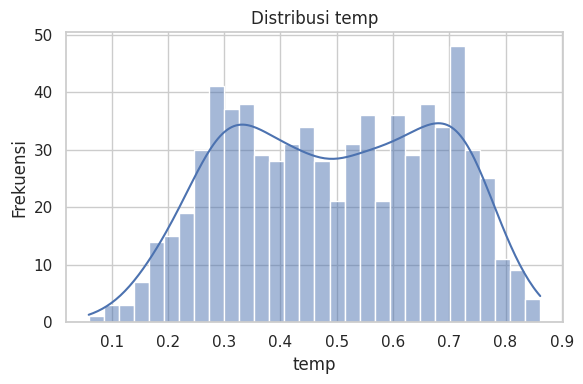

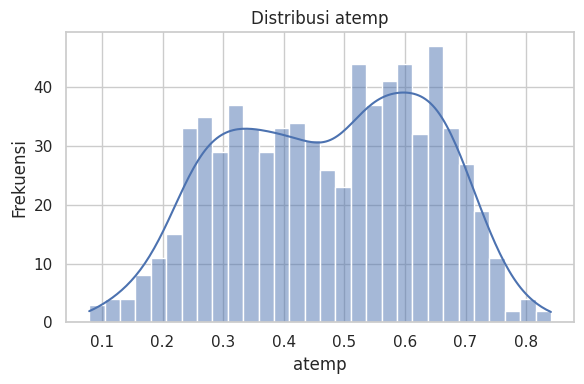

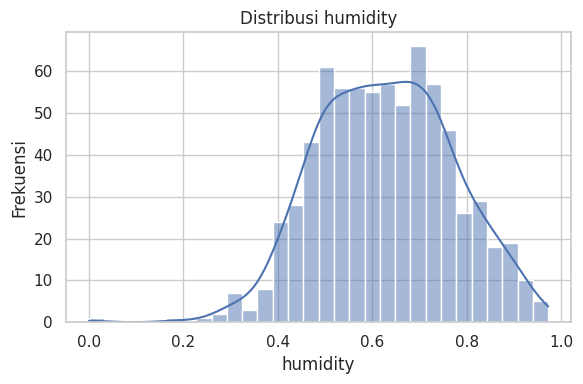

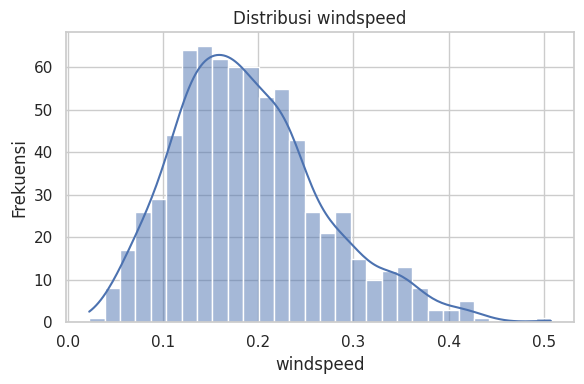

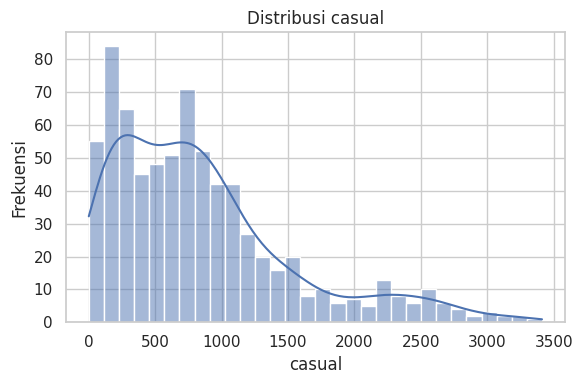

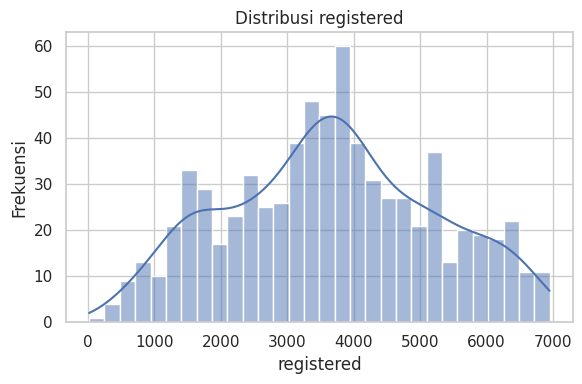

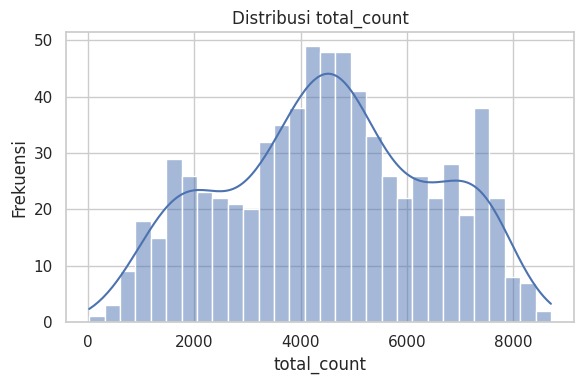

In [15]:
# Daily dataset
num_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'total_count']

for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_day[col], kde=True, bins=30)
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.tight_layout()
    plt.show()

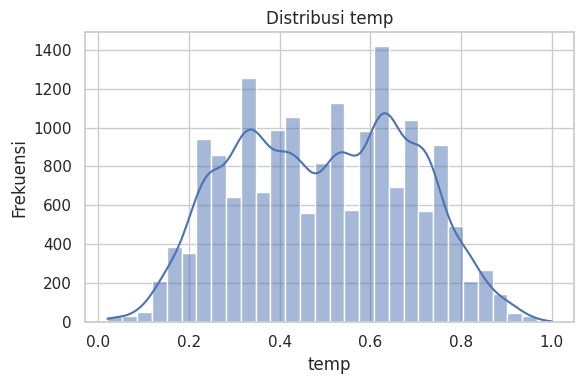

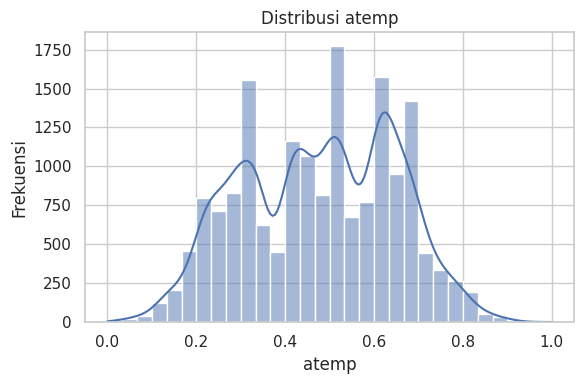

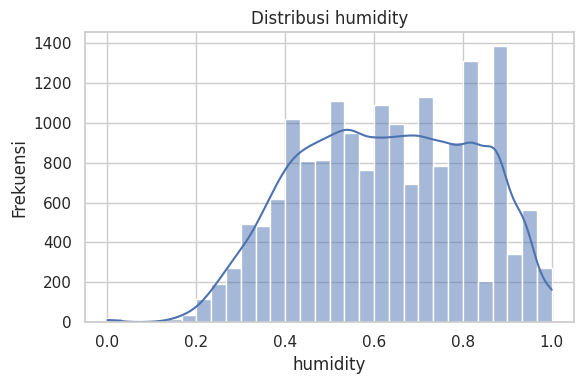

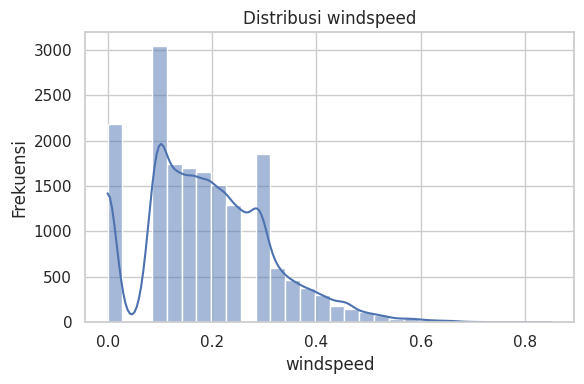

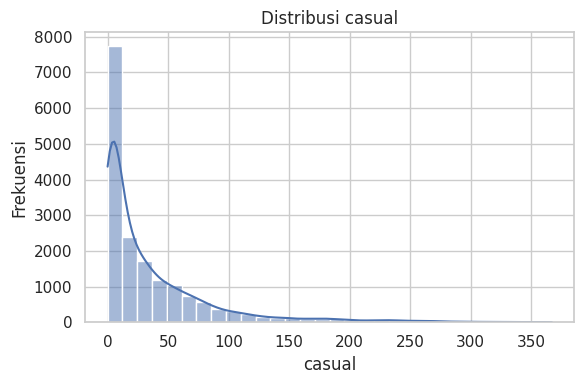

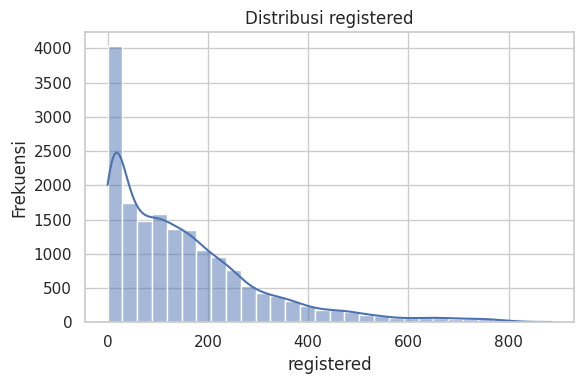

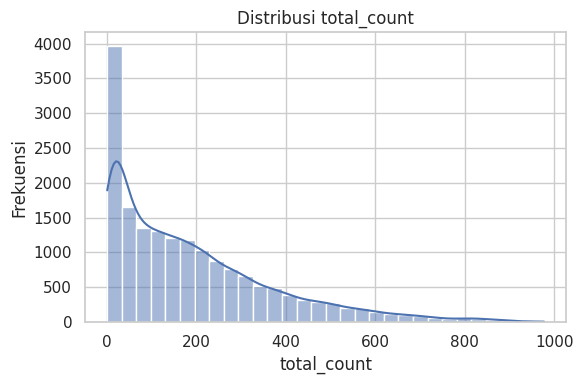

In [16]:
# Hour dataset
num_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'total_count']

for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_hour[col], kde=True, bins=30)
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.tight_layout()
    plt.show()

📊 Variabel Kategorik

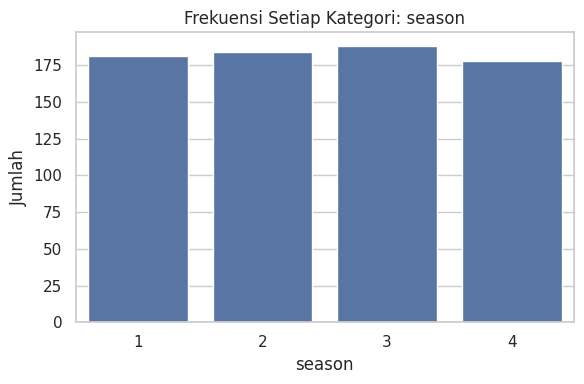

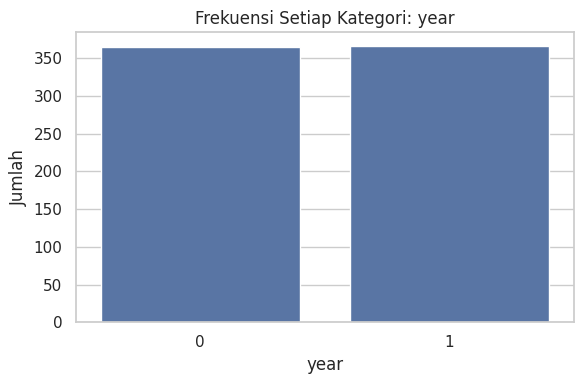

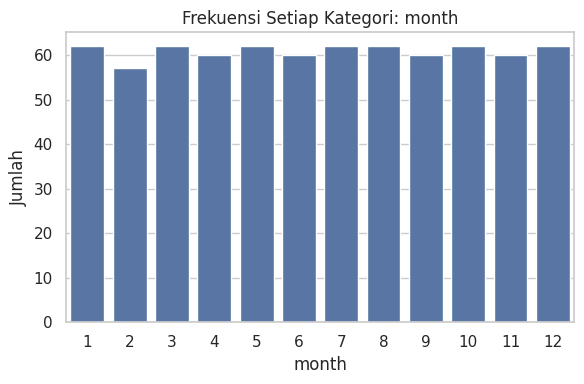

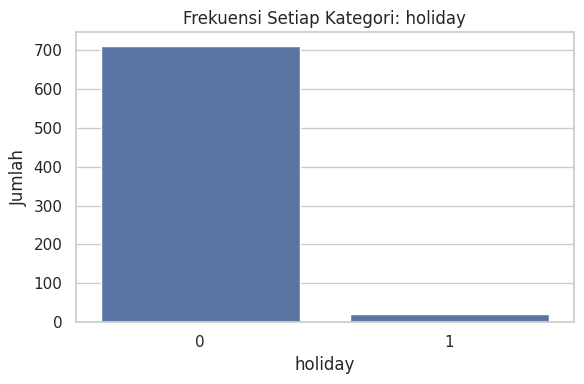

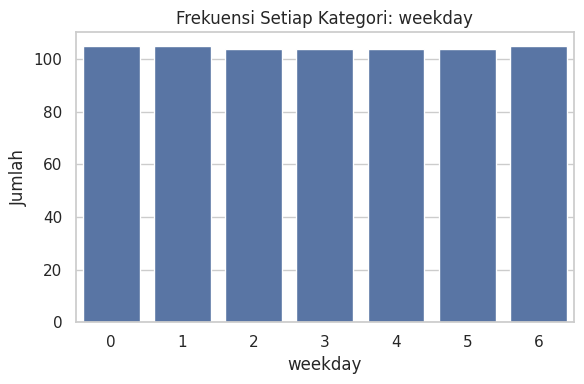

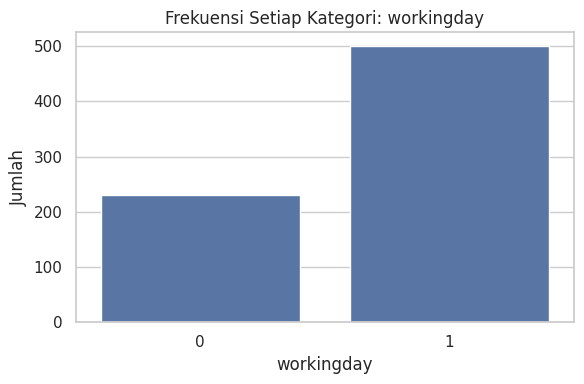

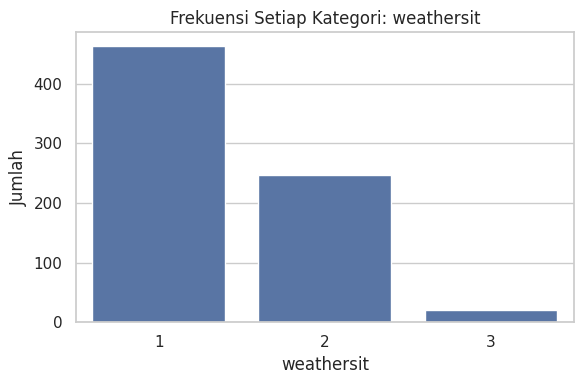

In [17]:
#Daily Dataset
cat_cols = ['season', 'year', 'month', 'holiday', 'weekday', 'workingday', 'weathersit']

for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df_day, x=col)
    plt.title(f'Frekuensi Setiap Kategori: {col}')
    plt.xlabel(col)
    plt.ylabel('Jumlah')
    plt.tight_layout()
    plt.show()

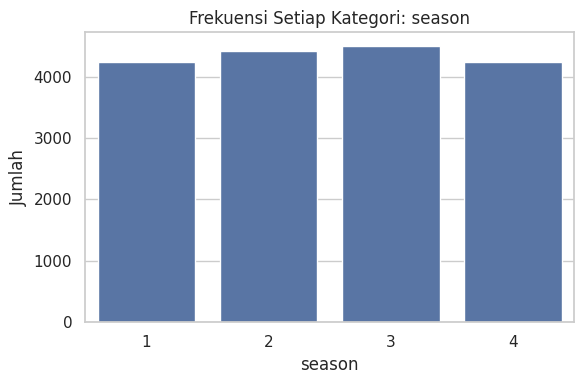

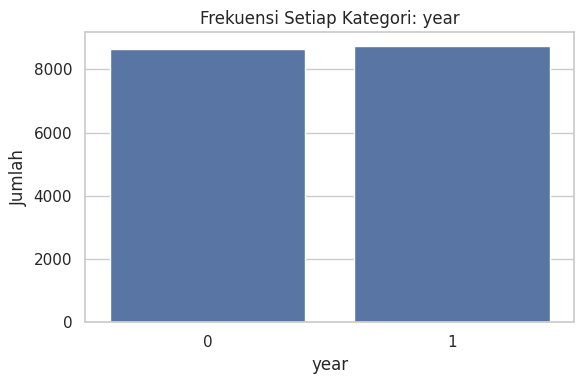

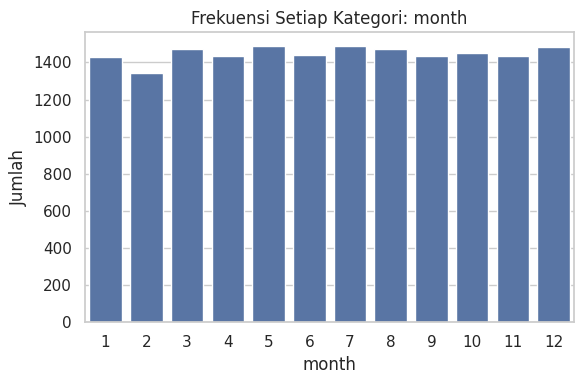

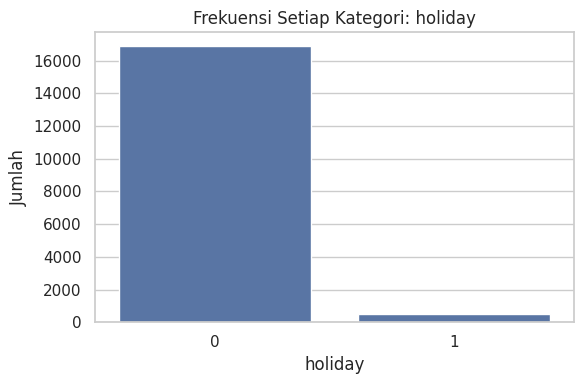

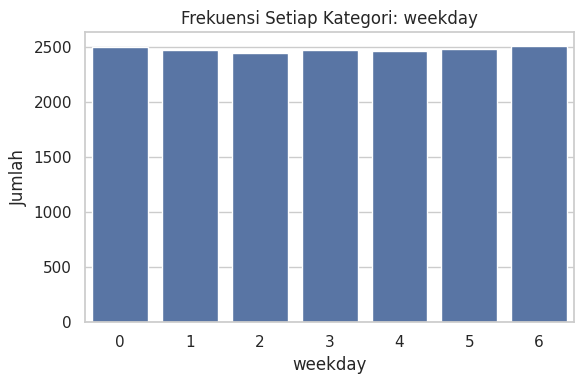

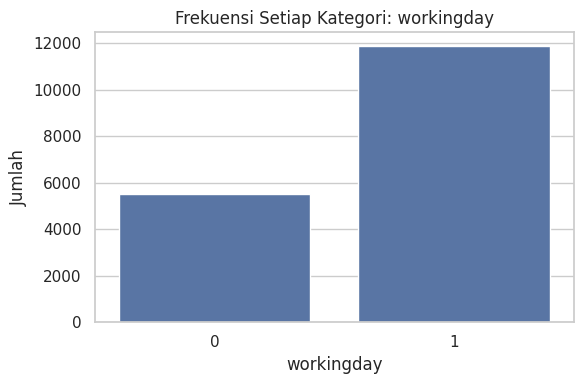

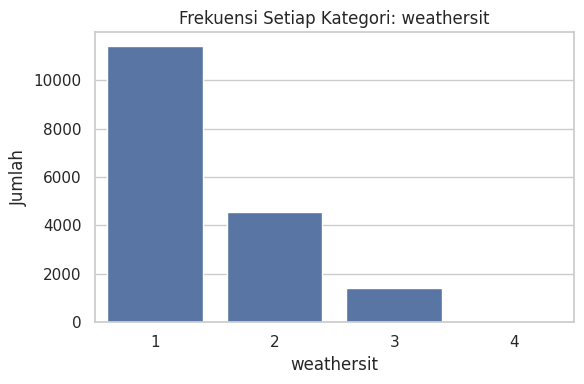

In [18]:
#Hourly Dataset
cat_cols = ['season', 'year', 'month', 'holiday', 'weekday', 'workingday', 'weathersit']

for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df_hour, x=col)
    plt.title(f'Frekuensi Setiap Kategori: {col}')
    plt.xlabel(col)
    plt.ylabel('Jumlah')
    plt.tight_layout()
    plt.show()

### EDA Multivariate

🔁 Korelasi antar Variabel Numerik

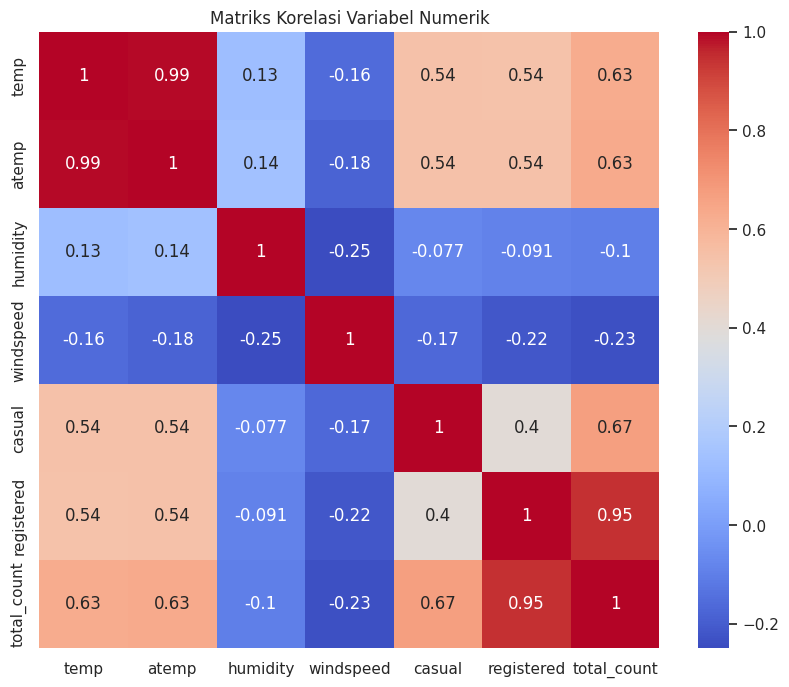

In [19]:
# Daily dataset
plt.figure(figsize=(10, 8))
sns.heatmap(df_day[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Matriks Korelasi Variabel Numerik")
plt.show()

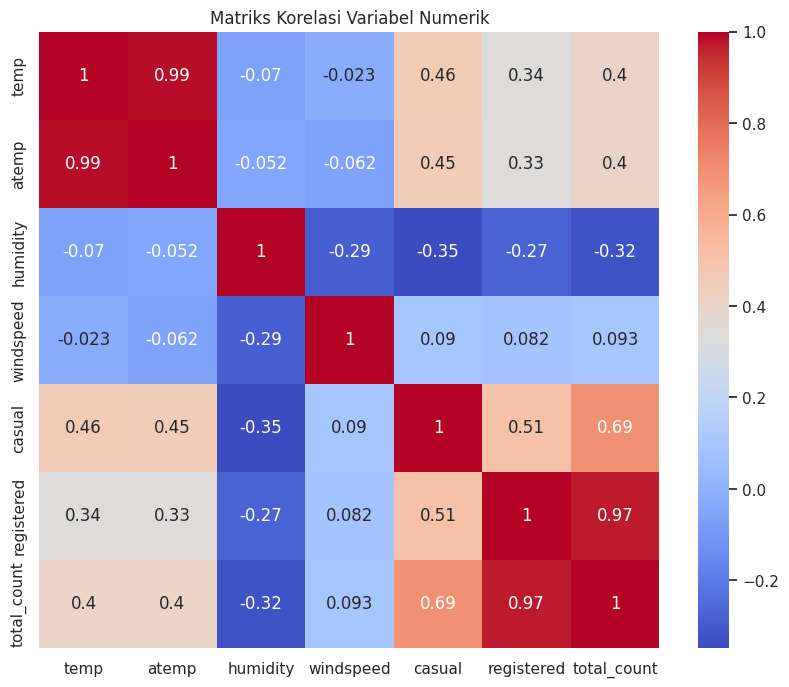

In [20]:
# Hourly dataset
plt.figure(figsize=(10, 8))
sns.heatmap(df_hour[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Matriks Korelasi Variabel Numerik")
plt.show()

📈 Hubungan Waktu vs Jumlah Peminjam

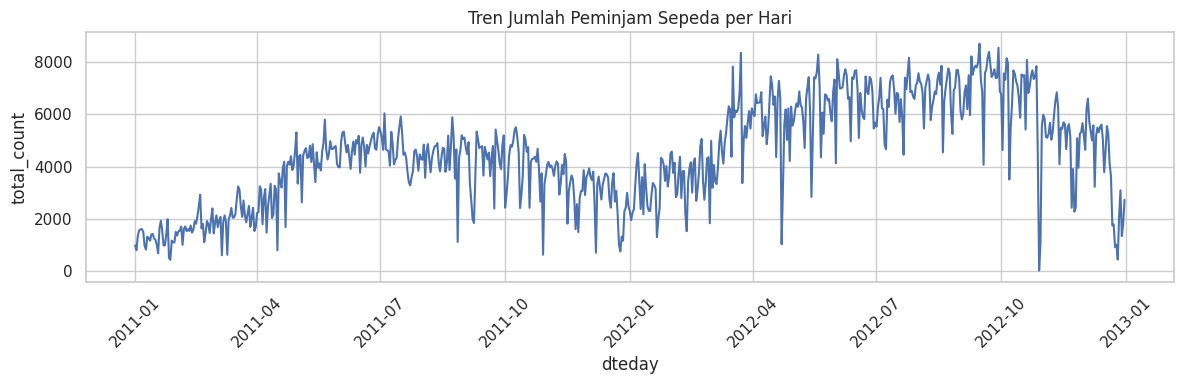

In [21]:
# Daily dataset
plt.figure(figsize=(12, 4))
sns.lineplot(data=df_day, x='dteday', y='total_count')
plt.title("Tren Jumlah Peminjam Sepeda per Hari")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insight:**
1. Ada tren peningkatan jumlah peminjam secara umum dari awal 2011 hingga pertengahan 2012.

2. Setelah itu, jumlah peminjam terlihat stabil namun sedikit menurun menjelang akhir 2012.

3. Terlihat adanya fluktuasi periodik, yang kemungkinan mencerminkan pola musiman atau hari libur tertentu.

**Kesimpulan:** Program peminjaman sepeda kemungkinan mengalami pertumbuhan popularitas di tahun-tahun awal, namun perlu strategi baru untuk menjaga tren tetap naik.



🧩 Interaksi antara Kategorikal dan Target

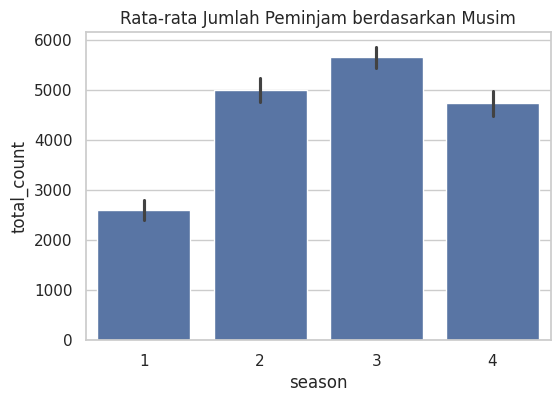

In [22]:
plt.figure(figsize=(6,4))
sns.barplot(data=df_day, x='season', y='total_count')
plt.title('Rata-rata Jumlah Peminjam berdasarkan Musim')
plt.show()

**Insight:**
1. Musim Gugur (Fall - 3) memiliki jumlah peminjam tertinggi. Hal ini bisa jadi karena cuaca yang masih nyaman untuk bersepeda dan aktivitas luar ruangan masih banyak dilakukan.

2. Musim Panas (Summer - 2) berada di posisi kedua, menunjukkan bahwa cuaca cerah juga mendorong peminjaman.

3. Musim Semi (Spring - 1) memiliki jumlah peminjam yang sedikit lebih rendah dibanding Fall dan Summer, mungkin karena masih ada sisa hawa dingin dari musim dingin.

4. Musim Dingin (Winter - 4) memiliki jumlah peminjam terendah, yang logis karena suhu dingin dan kemungkinan salju membuat aktivitas bersepeda menjadi kurang nyaman.

**Kesimpulan:**
Cuaca sedang hingga hangat (Spring, Summer, Fall) mendorong penggunaan sepeda, sedangkan cuaca dingin (Winter) menurunkan jumlah peminjaman secara signifikan.



🕒 Pola Peminjaman per Jam

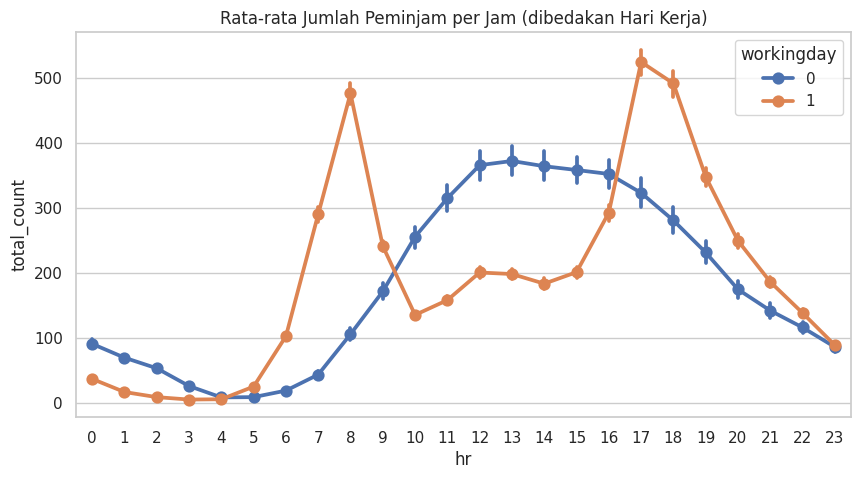

In [23]:
plt.figure(figsize=(10,5))
sns.pointplot(data=df_hour, x='hr', y='total_count', hue='workingday')
plt.title('Rata-rata Jumlah Peminjam per Jam (dibedakan Hari Kerja)')
plt.show()

**Insight:**

1 Hari kerja (workingday = 1) menunjukkan dua puncak peminjaman:

- Sekitar pukul 08.00 pagi (kemungkinan pengguna berangkat kerja).

- Sekitar pukul 17.00 sore (jam pulang kerja).

2. Hari libur (workingday = 0) menunjukkan puncak tunggal yang terjadi pada sore hari sekitar pukul 14.00-16.00.

**Kesimpulan:** Perilaku peminjaman sepeda sangat dipengaruhi oleh rutinitas kerja. Pada hari kerja, peminjaman lebih terkonsentrasi pada jam sibuk, sementara pada hari libur, pola lebih menyebar dan tidak terlalu tajam.



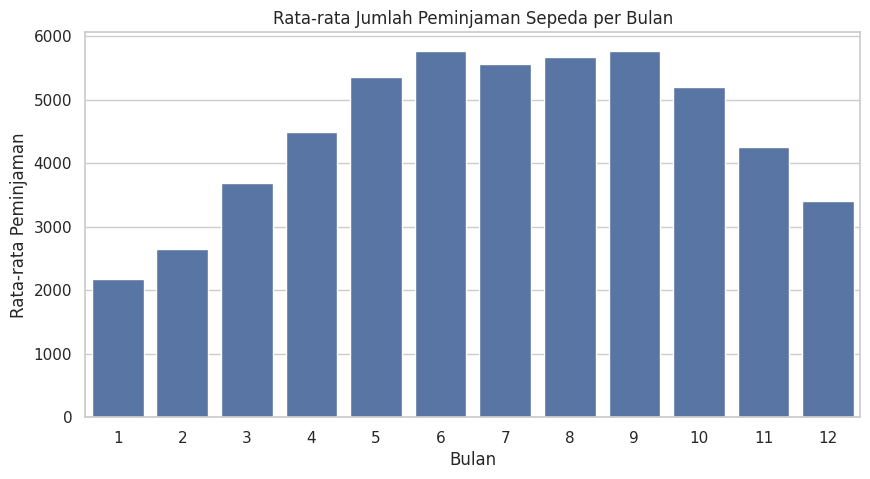

In [24]:
# Trend jumlah peminjaman per bulan
# Extract the month from the 'dteday' column and create a new 'month' column
df_day['mnth'] = pd.to_datetime(df_day['dteday']).dt.month

monthly_counts = df_day.groupby('mnth')['total_count'].mean()

plt.figure(figsize=(10,5))
sns.barplot(x=monthly_counts.index, y=monthly_counts.values)
plt.title('Rata-rata Jumlah Peminjaman Sepeda per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Peminjaman')
plt.show()

**Insight:**

1. Tren Musiman: Jumlah peminjaman sepeda meningkat signifikan dari bulan Januari (1) hingga mencapai puncaknya pada bulan Juni (6) hingga September (9).

2. Musim Panas Lebih Ramai: Bulan Juni-September adalah periode dengan rata-rata peminjaman tertinggi, kemungkinan besar karena cuaca yang lebih mendukung aktivitas luar ruangan.

3. Penurunan di Musim Dingin: Setelah bulan September, terjadi penurunan jumlah peminjaman, dengan angka terendah di bulan Desember, yang bisa jadi karena cuaca lebih dingin atau tidak bersahabat.

**Kesimpulan:** Peminjaman sepeda cend
erung tinggi di musim panas dan rendah di musim dingin. Ini menunjukkan pengaruh musim/cuaca terhadap penggunaan layanan sepeda.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

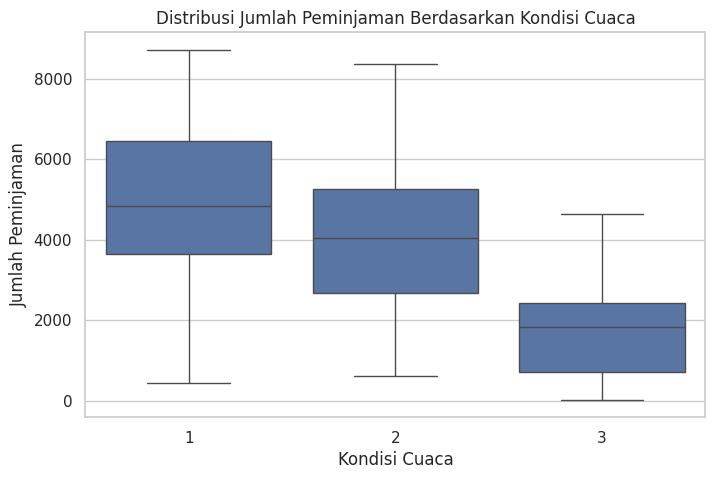

In [25]:
# Visualisasi pengaruh cuaca terhadap total peminjaman
plt.figure(figsize=(8,5))
sns.boxplot(x='weathersit', y='total_count', data=df_day)
plt.title('Distribusi Jumlah Peminjaman Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Peminjaman')
plt.show()

### Pertanyaan 2:

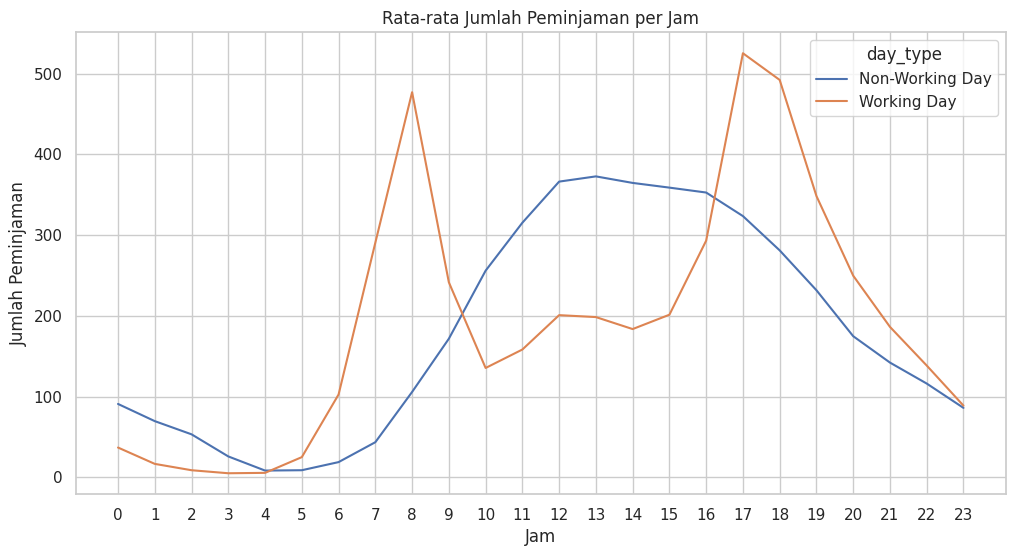

In [26]:
# Analisis jam per jam di hari kerja vs libur
df_hour['day_type'] = df_hour['workingday'].apply(lambda x: 'Working Day' if x == 1 else 'Non-Working Day')

avg_hourly = df_hour.groupby(['hr', 'day_type'])['total_count'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=avg_hourly, x='hr', y='total_count', hue='day_type')
plt.title('Rata-rata Jumlah Peminjaman per Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Peminjaman')
plt.xticks(range(0,24))
plt.show()

**Insight:**

📊 Pertanyaan 1: Pengaruh Kondisi Cuaca terhadap Jumlah Peminjaman:

- Cuaca Berpengaruh Signifikan: Terlihat bahwa semakin buruk kondisi cuaca (dari 1 ke 3), maka rata-rata jumlah peminjaman sepeda menurun.

- Cuaca 1 (Cerah/Clear) → Jumlah peminjaman tertinggi.

- Cuaca 3 (Buruk/Hujan atau Berkabut) → Jumlah peminjaman sangat rendah.

**Kesimpulan:** Orang cenderung lebih sering menggunakan sepeda saat cuaca cerah dan menghindari saat cuaca memburuk.


📈 Pertanyaan 2 - Pola Peminjaman per Jam di Hari Kerja vs Hari Libur:

1. Hari Kerja (Working Day):

  - Ada dua puncak peminjaman sepeda yaitu sekitar pukul 8 pagi dan pukul 5–6 sore.

  - Ini konsisten dengan jam berangkat dan pulang kerja atau sekolah → aktivitas komuter.

2. Hari Libur (Non-Working Day):

  - Puncak peminjaman terjadi sekitar pukul 1–2 siang, lalu menurun setelahnya.

  - Artinya, peminjaman sepeda lebih bersifat rekreasional di siang hari saat libur.

**Kesimpulan:** Peminjaman sepeda di hari kerja didorong oleh aktivitas rutin, sementara di hari libur dipengaruhi oleh aktivitas santai atau hiburan.



## Analisis Lanjutan

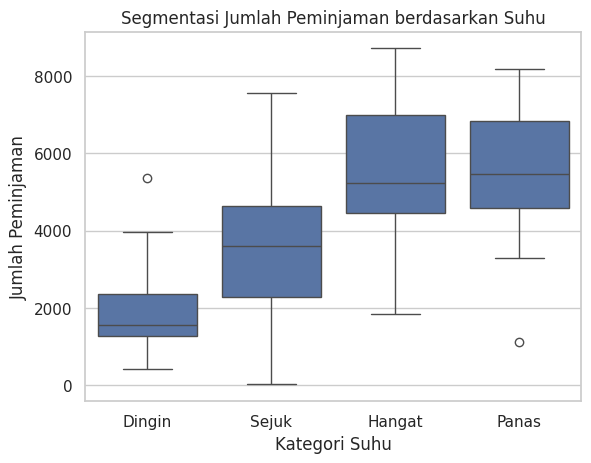

In [27]:
# Contoh: Manual clustering untuk segmentasi suhu
df_day['temp_bin'] = pd.cut(df_day['temp'], bins=4, labels=["Dingin", "Sejuk", "Hangat", "Panas"])
sns.boxplot(x='temp_bin', y='total_count', data=df_day)
plt.title('Segmentasi Jumlah Peminjaman berdasarkan Suhu')
plt.xlabel('Kategori Suhu')
plt.ylabel('Jumlah Peminjaman')
plt.show()

**Insight**

🌡️ Pengaruh Suhu terhadap Jumlah Peminjaman Sepeda:
- Peminjaman meningkat saat suhu lebih hangat.

  - Kategori Hangat dan Panas memiliki median peminjaman lebih tinggi dibanding Dingin dan Sejuk.

- Kategori Dingin menunjukkan jumlah peminjaman yang paling rendah.

- Distribusi data lebih tersebar di suhu hangat dan panas, menunjukkan banyaknya variasi aktivitas peminjaman saat cuaca nyaman.

✅ **Kesimpulan:**
Semakin hangat suhu udara, semakin tinggi pula jumlah peminjaman sepeda. Cuaca hangat cenderung lebih nyaman untuk aktivitas bersepeda.

## Conclusion

**📊 KESIMPULAN AKHIR ANALISIS DATA PEMINJAMAN SEPEDA**
1. 📅 Rata-rata Peminjaman Sepeda per Bulan
  
  - Jumlah peminjaman meningkat signifikan pada musim panas (Mei-September).

  - Bulan dengan peminjaman tertinggi adalah Juni–September, diduga karena cuaca lebih mendukung untuk bersepeda.

  - Bulan Januari-Maret dan Desember memiliki peminjaman terendah.

  ➡️ **Insight:** Aktivitas bersepeda lebih tinggi saat musim panas atau cuaca cerah.

2. 🌦️ Distribusi Jumlah Peminjaman Berdasarkan Kondisi Cuaca

  - Semakin buruk kondisi cuaca (dari cerah → hujan), jumlah peminjaman semakin menurun.

  - Cuaca jenis 1 (Cerah/berawan) memiliki jumlah peminjaman tertinggi, sedangkan jenis 3 (Hujan/lebat) terendah.

  ➡️ **Jawaban Pertanyaan 1: Ya, kondisi cuaca berpengaruh terhadap jumlah peminjaman. Orang cenderung tidak meminjam sepeda saat cuaca buruk.**

3. 📈 Rata-rata Jumlah Peminjaman per Jam pada Working Day vs Non-Working Day

  - Pada hari kerja, jumlah peminjaman memuncak di jam 07.00 dan 17.00 (indikasi penggunaan untuk berangkat dan pulang kerja).

  - Pada akhir pekan, peminjaman lebih stabil sepanjang hari, dengan puncak sekitar jam 11.00-15.00.

  ➡️ **Jawaban Pertanyaan 2: Hari kerja vs. akhir pekan menunjukkan pola peminjaman yang berbeda. Hari kerja lebih dipakai untuk aktivitas rutin, sedangkan akhir pekan untuk rekreasi.**

4. 🌡️ Segmentasi Jumlah Peminjaman Berdasarkan Suhu

  - Semakin hangat suhu udara, semakin tinggi pula jumlah peminjaman.

  - Suhu dingin memiliki jumlah peminjaman yang paling rendah.

  ➡️ **Insight:** Suhu hangat nyaman untuk bersepeda, mendukung peningkatan jumlah peminjaman.

In [28]:
!pip freeze > requirements.txt

In [30]:
from google.colab import files
files.download('requirements.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>